# Project 4: Regression Analysis and Define Your Own Task!

## Group Members
- Shaira Alam

- Vani Agrawal 

- Dhakshina Ilango

# Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Question 1

## Dataset 1

In [2]:
# Read the CSV file into a DataFrame
diamonds_data = pd.read_csv("diamonds_ece219.csv")
diamonds_data_numbers = diamonds_data.select_dtypes(include=['number'])
diamonds_data_objects = diamonds_data.select_dtypes(include=['object'])

# Display the first few rows of the DataFrame to verify data is loaded correctly
print(diamonds_data.head())

   Unnamed: 0 color clarity  carat        cut   symmetry     polish  \
0           0     E    VVS2   0.09  Excellent  Very Good  Very Good   
1           1     E    VVS2   0.09  Very Good  Very Good  Very Good   
2           2     E    VVS2   0.09  Excellent  Very Good  Very Good   
3           3     E    VVS2   0.09  Excellent  Very Good  Very Good   
4           4     E    VVS2   0.09  Very Good  Very Good  Excellent   

   depth_percent  table_percent  length  width  depth girdle_min girdle_max  \
0           62.7           59.0    2.85   2.87   1.79          M          M   
1           61.9           59.0    2.84   2.89   1.78        STK        STK   
2           61.1           59.0    2.88   2.90   1.77         TN          M   
3           62.0           59.0    2.86   2.88   1.78          M        STK   
4           64.9           58.5    2.79   2.83   1.82        STK        STK   

   price  
0    200  
1    200  
2    200  
3    200  
4    200  


## Dataset 2

In [ ]:
pip install ucimlrepo

In [ ]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine_quality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = wine_quality.data.features 
y = wine_quality.data.targets 
  
# metadata 
print(wine_quality.metadata) 
  
# variable information 
print(wine_quality.variables) 

## 1.1
### Plot a heatmap of the Pearson correlation matrix of the dataset columns. 

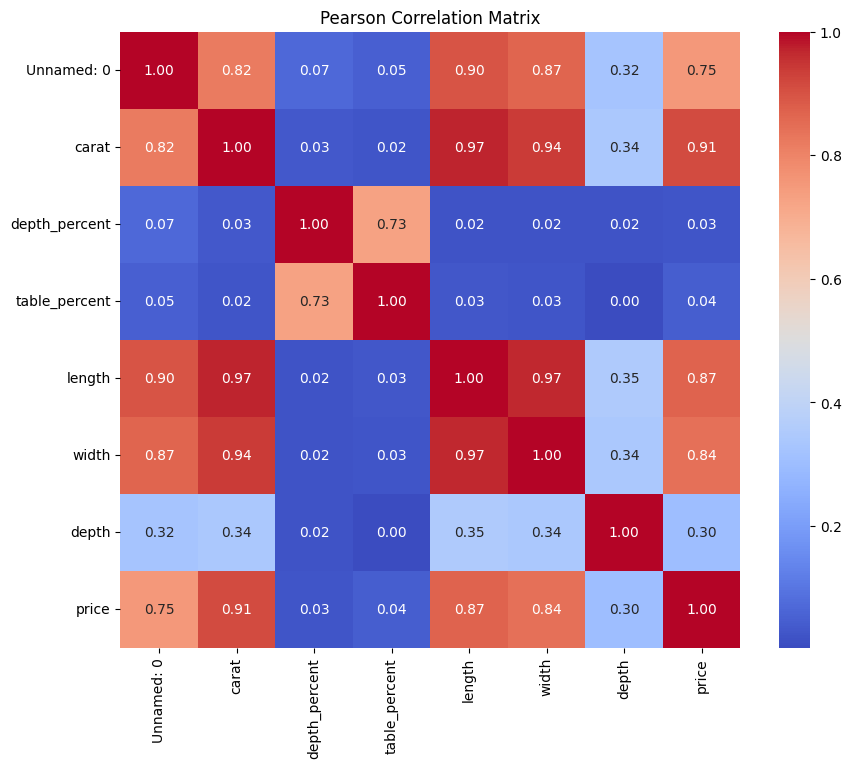

In [15]:
# Calculate the Pearson correlation matrix
corr_matrix = diamonds_data_numbers.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Pearson Correlation Matrix')
plt.show()


### Report which features have the highest absolute correlation with the target variable. 

In [17]:
# Find features with highest absolute correlation with the target variable
target_corr = corr_matrix['price'].abs().sort_values(ascending=False)
highest_corr_features = target_corr[1:]  # Excluding the target variable itself

print("Features with highest absolute correlation with the target variable (price):\n", highest_corr_features)

Features with highest absolute correlation with the target variable (price):
 carat            0.913479
length           0.869521
width            0.841887
Unnamed: 0       0.753482
depth            0.299696
table_percent    0.042453
depth_percent    0.025469
Name: price, dtype: float64


### In the context of either dataset, describe what the correlation patterns suggest.

## 1.2

### Plot the histogram of numerical features.

<Figure size 1200x1000 with 0 Axes>

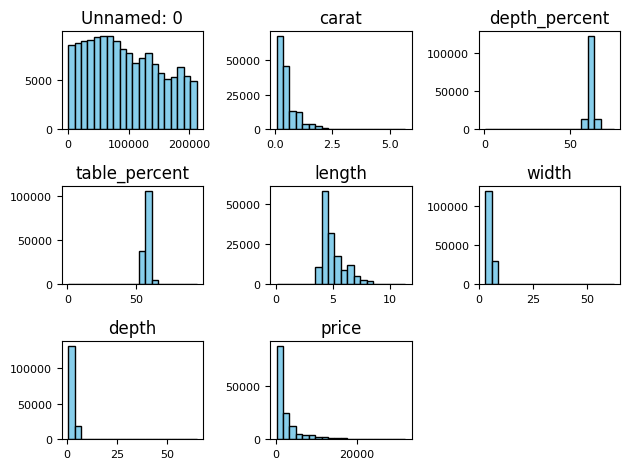

Skewness of numerical features:
Unnamed: 0        0.263138
carat             2.331773
depth_percent   -13.559608
table_percent   -11.046563
length            1.283604
width             4.115348
depth            27.493299
price             3.071737
dtype: float64


In [20]:
# Plot histograms of numerical features
plt.figure(figsize=(12, 10))
diamonds_data_numbers.hist(bins=20, color='skyblue', edgecolor='black', linewidth=1.0, xlabelsize=8, ylabelsize=8, grid=False)
plt.tight_layout()
plt.show()

# Check skewness of numerical features
skewness = diamonds_data_numbers.skew()
print("Skewness of numerical features:")
print(skewness)

# Handle high skewness using preprocessing techniques (e.g., log transformation)
skewed_features = skewness[abs(skewness) > 1].index
for feature in skewed_features:
    diamonds_data_numbers[feature] = np.log1p(diamonds_data_numbers[feature])

### What preprocessing can be done if the distribution of a feature has high skewness?

## 1.3

### Construct and inspect the box plot of categorical features vs target variable.

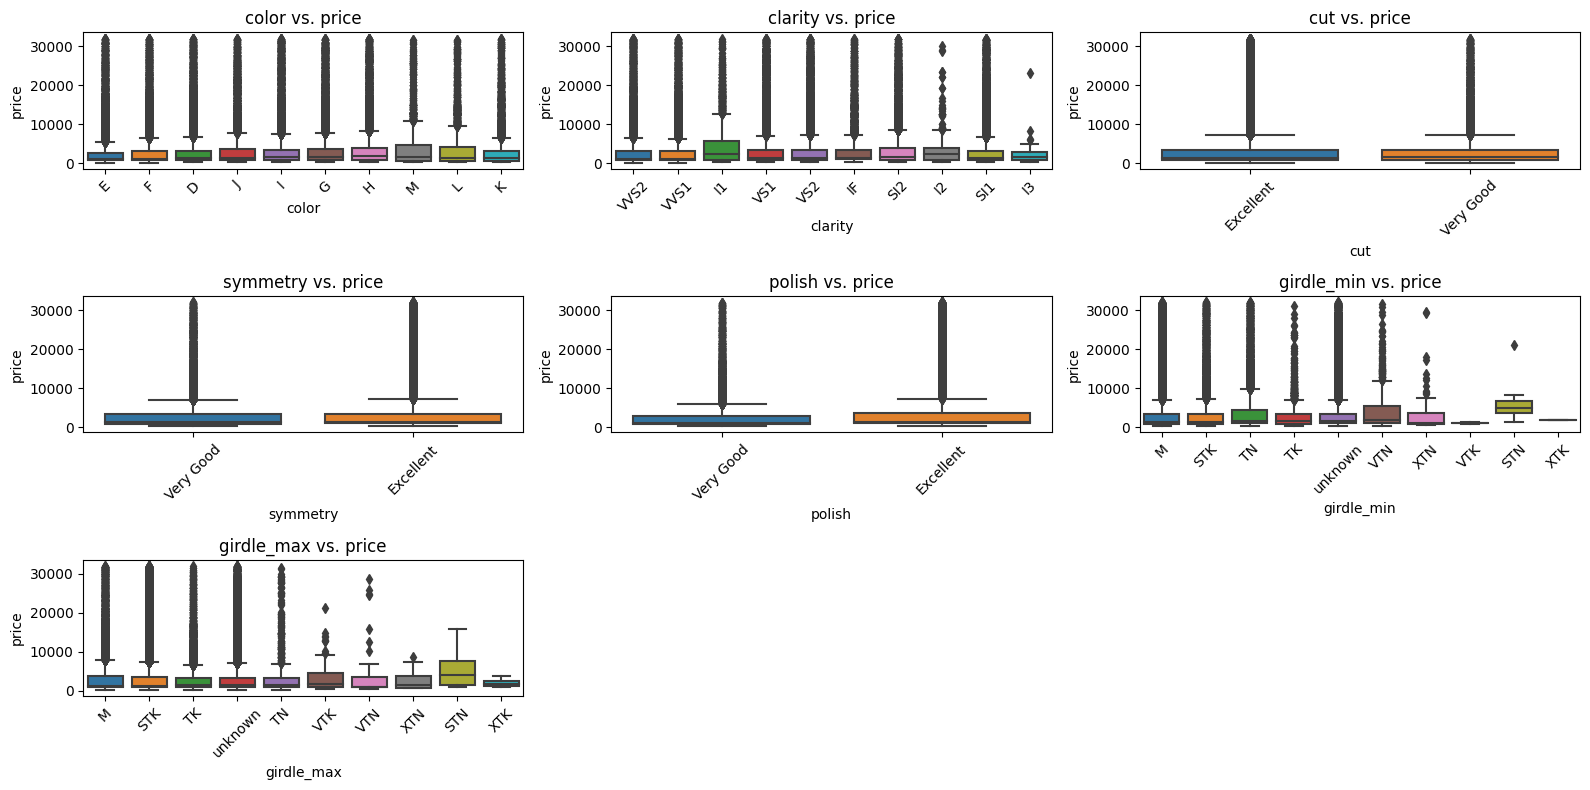

In [25]:
# Visualize box plots of categorical features vs. target variable (price)
num_plots = len(diamonds_data_objects.columns)
num_rows = (num_plots - 1) // 3 + 1  # Calculate the number of rows needed for subplots
plt.figure(figsize=(16, 8))
for i, col in enumerate(diamonds_data_objects.columns, start=1):
    plt.subplot(num_rows, 3, i)
    sns.boxplot(x=col, y='price', data=diamonds_data)
    plt.title(f'{col} vs. price')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

### What do you find?

## 1.4
For the Diamonds dataset, plot the counts by color, cut and clarity.

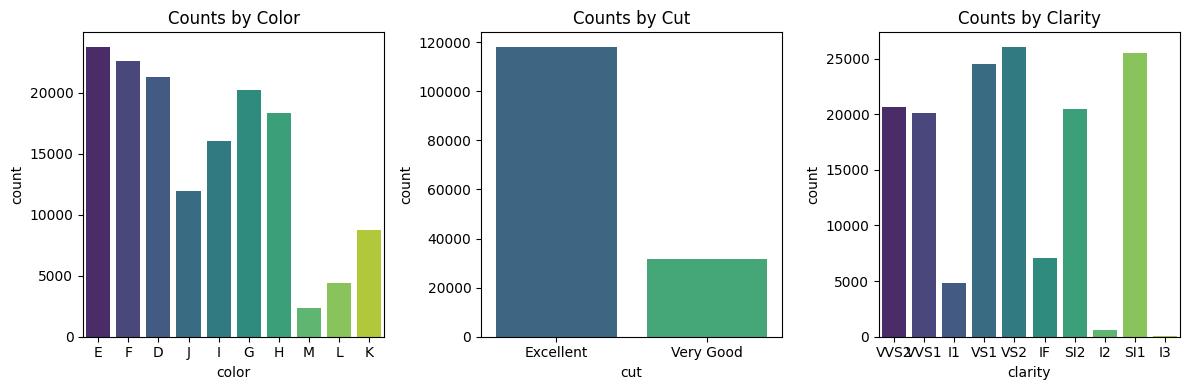

In [28]:
# Plot counts by color
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(x='color', data=diamonds_data, palette='viridis')
plt.title('Counts by Color')

# Plot counts by cut
plt.subplot(1, 3, 2)
sns.countplot(x='cut', data=diamonds_data, palette='viridis')
plt.title('Counts by Cut')

# Plot counts by clarity
plt.subplot(1, 3, 3)
sns.countplot(x='clarity', data=diamonds_data, palette='viridis')
plt.title('Counts by Clarity')

plt.tight_layout()
plt.show()

# Question 2

## 2.1
Standardize feature columns and prepare them for training.

In [31]:
# Separate features (X) and target variable (y)
X = diamonds_data.drop(columns=['price'])  # Features (all columns except 'price')
y = diamonds_data['price']  # Target variable

# Standardize numerical features
numeric_features = X.select_dtypes(include=['number'])
scaler = StandardScaler()
X[numeric_features.columns] = scaler.fit_transform(numeric_features)

# Prepare data for training (split into train and test sets)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 2.2

### Describe how this step qualitatively affects the performance of your models in terms of test RMSE. 

### Is it true for all model types? 

### Also list two features for either dataset that has the lowest MI w.r.t to the target.

# Question 3

## 3.1 
Training: train multiple algorithms and compare their performance using average RMSE from 10-fold cross-validation

In [36]:
# Separate features (X) and target variable (y)
X = diamonds_data.drop(columns=['price'])
y = diamonds_data['price']

# Define numerical and categorical features
numeric_features = X.select_dtypes(include=['number']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define algorithms
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor()
}

# Define number of folds for cross-validation
num_folds = 10

# Perform cross-validation and calculate average RMSE for each algorithm
results = {}
for model_name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(pipeline, X, y, cv=kfold, scoring='neg_root_mean_squared_error')
    avg_rmse = np.mean(np.abs(cv_results))
    results[model_name] = avg_rmse

# Print average RMSE for each algorithm
for model_name, avg_rmse in results.items():
    print(f'{model_name}: Average RMSE = {avg_rmse:.2f}')

Linear Regression: Average RMSE = 1475.24
Decision Tree: Average RMSE = 17.04
Random Forest: Average RMSE = 20.02


## 3.2 
Evaluation: Perform 10-fold cross-validation and measure average RMSE errors for training and validation sets. For random forest model, measure “Out-of-Bag Error” (OOB) as well.

In [ ]:
# Define number of folds for cross-validation
num_folds = 10

for model_name, model in models.items():
    # Initialize lists to store RMSE scores
    train_rmse_scores = []
    val_rmse_scores = []
    oob_scores = []

    # Perform cross-validation
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    for train_index, val_index in kf.split(X):
        X_train, X_val = X.iloc[train_index], X.iloc[val_index]
        y_train, y_val = y.iloc[train_index], y.iloc[val_index]

        # Preprocess the data
        X_train_preprocessed = preprocessor.fit_transform(X_train)
        X_val_preprocessed = preprocessor.transform(X_val)

        # Fit the model on training data
        model.fit(X_train_preprocessed, y_train)

        # Predict on training and validation data
        y_train_pred = model.predict(X_train_preprocessed)
        y_val_pred = model.predict(X_val_preprocessed)

        # Calculate RMSE for training and validation sets
        train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
        val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))

        train_rmse_scores.append(train_rmse)
        val_rmse_scores.append(val_rmse)

        # Calculate Out-of-Bag (OOB) score if applicable
        if hasattr(model, 'oob_score_'):
            oob_score = model.oob_score_
            oob_scores.append(oob_score)

    # Calculate average RMSE scores
    avg_train_rmse = np.mean(train_rmse_scores)
    avg_val_rmse = np.mean(val_rmse_scores)
    if hasattr(model, 'oob_score_'):
        avg_oob_score = np.mean(oob_scores)
        print(f'{model_name}: Average Training RMSE = {avg_train_rmse:.2f}, Average Validation RMSE = {avg_val_rmse:.2f}, Average OOB Score = {avg_oob_score:.2f}')
    else:
        print(f'{model_name}: Average Training RMSE = {avg_train_rmse:.2f}, Average Validation RMSE = {avg_val_rmse:.2f}')

: 

# Question 4

## 4.0 Train Models

Ordinary least squares (linear regression without regularization)

In [ ]:
from sklearn.linear_model import LinearRegression
ols_model = LinearRegression()
ols_model.fit(X_train, y_train)

Lasso

In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha=1.0) # need to tune
lasso_model.fit(X_train, y_train)

Ridge regression

In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha=1.0) # need to tune
ridge_model.fit(X_train, y_train)

## 4.1

## 4.2

## 4.3

## 4.4

# Question 5

## 5.1

## 5.2

# Question 6

## 6.1

## 6.2

## 6.3

## 6.4

# Question 7

## 7.1

## 7.2

## 7.3

## 7.4

# Question 8

## 8.1

## 8.2

## 8.3

# Question 9

## 9.1

## 9.2

# Question 10

## 10.1

## 10.2

## 10.3

## 10.4